> Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

> Importing data

In [2]:
df = pd.read_csv(
    '/kaggle/input/d/hodajalali/sensorless-drive-diagnosis/Sensorless_drive_diagnosis.txt', 
    delim_whitespace=True, 
    header=None
)
column_names =[]
for i in range(df.shape[1]-1):
    column_names.append("Feature"+str(i+1))
column_names.append('Class')
df.columns = column_names

> Classes

In [3]:
print('Unique classes:')
print(df['Class'].unique())

Unique classes:
[ 1  2  3  4  5  6  7  8  9 10 11]


Text(0.5, 1.0, '# datapoints in each class')

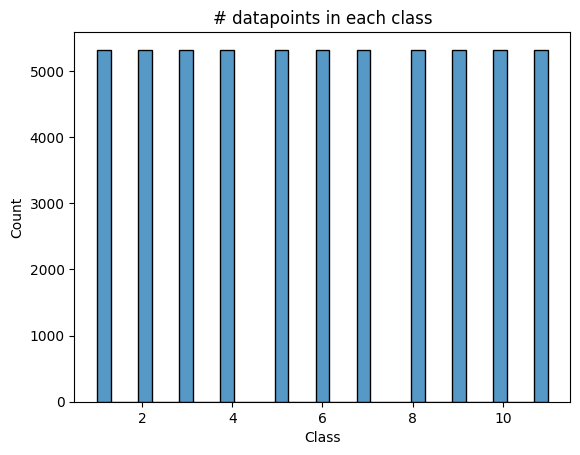

In [4]:
sns.histplot(df['Class'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('# datapoints in each class')

> Prepare data

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']
y_dummies = pd.get_dummies(df['Class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


>  Function to evaluate models

In [6]:
def evaluate_model(predictions, y_test):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)


> Logistic Regression

In [7]:
def train_logistic_regression(X_train, y_train, X_test):
    model = LogisticRegression(solver='lbfgs', max_iter=100)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

In [8]:
lr_predictions = train_logistic_regression(X_train, y_train, X_test)
print("Logistic Regression:")
evaluate_model(lr_predictions, y_test)

Logistic Regression:
Accuracy: 0.5326
Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.45      0.46      1074
           2       0.41      0.35      0.38      1089
           3       0.49      0.17      0.25      1044
           4       0.55      0.71      0.62      1048
           5       0.38      0.19      0.25      1066
           6       0.44      0.25      0.31      1057
           7       0.84      0.99      0.91      1103
           8       0.46      0.53      0.49      1029
           9       0.38      0.52      0.44      1012
          10       0.38      0.67      0.49      1072
          11       1.00      1.00      1.00      1108

    accuracy                           0.53     11702
   macro avg       0.53      0.53      0.51     11702
weighted avg       0.53      0.53      0.51     11702



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


> Decision Trees

In [9]:
def train_decision_tree(X_train, y_train, X_test):
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

In [10]:
dt_predictions = train_decision_tree(X_train, y_train, X_test)
print("\nDecision Tree:")
evaluate_model(dt_predictions, y_test)


Decision Tree:
Accuracy: 0.9847
Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1074
           2       0.99      0.98      0.99      1089
           3       0.99      0.99      0.99      1044
           4       0.99      0.99      0.99      1048
           5       0.97      0.96      0.97      1066
           6       0.97      0.98      0.97      1057
           7       1.00      1.00      1.00      1103
           8       0.97      0.97      0.97      1029
           9       0.98      0.98      0.98      1012
          10       0.99      0.99      0.99      1072
          11       1.00      1.00      1.00      1108

    accuracy                           0.98     11702
   macro avg       0.98      0.98      0.98     11702
weighted avg       0.98      0.98      0.98     11702



> Random Forests

In [11]:
def train_random_forest(X_train, y_train, X_test):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

In [12]:
rf_predictions = train_random_forest(X_train, y_train, X_test)
print("\nRandom Forest:")
evaluate_model(rf_predictions, y_test)


Random Forest:
Accuracy: 0.9991
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1074
           2       1.00      1.00      1.00      1089
           3       1.00      1.00      1.00      1044
           4       1.00      1.00      1.00      1048
           5       1.00      1.00      1.00      1066
           6       1.00      1.00      1.00      1057
           7       1.00      1.00      1.00      1103
           8       1.00      1.00      1.00      1029
           9       1.00      1.00      1.00      1012
          10       1.00      1.00      1.00      1072
          11       1.00      1.00      1.00      1108

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702

